<a href="https://colab.research.google.com/github/sam0786-xyz/Machine-Learning/blob/main/KMEANS_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical 8: K-means Clustering
 1.Load a dataset suitable for clustering (e.g., customer segmentation dataset).

 2.Implement k-means clustering using scikit-learn.

 3.Determine the optimal number of clusters using the elbow method and visualize the clusters.


In [ ]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!unzip archive.zip

Archive:  archive.zip
replace Mall_Customers.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: Mall_Customers.csv      


In [ ]:
df = pd.read_csv('Mall_Customers.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
def handle_outliers(df, columns, n_std=3):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        z_score = np.abs(stats.zscore(df_clean[col]))

        iqr_mask = (df_clean[col] >= Q1 - 1.5 * IQR) & (df_clean[col] <= Q3 + 1.5 * IQR)
        zscore_mask = z_score <= n_std
        mask = iqr_mask #& zscore_mask
        median_value = df[col].median()
        df_clean.loc[~mask, col] = median_value

        print(f"Replaced {(~mask).sum()} outliers in {col}")

    return df_clean

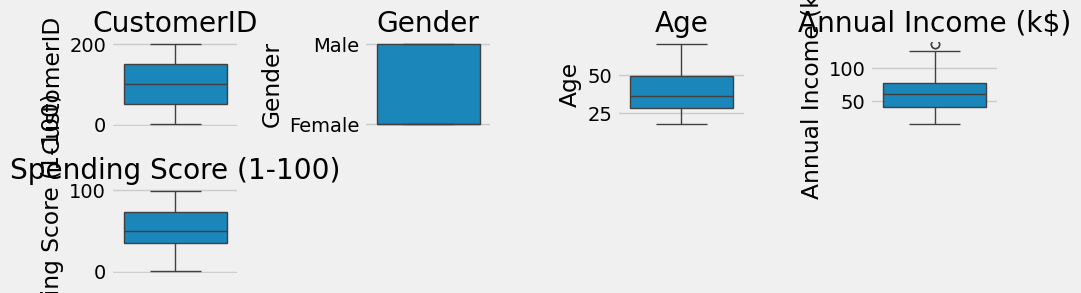

In [ ]:
plt.figure(figsize=(10,6))
for i, column in enumerate(df.columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=df, y=column)
    plt.title(column)
plt.tight_layout()
plt.show()

In [ ]:
outlier_columns = ['Annual Income (k$)']
df_clean = handle_outliers(df, outlier_columns)

Replaced 2 outliers in Annual Income (k$)


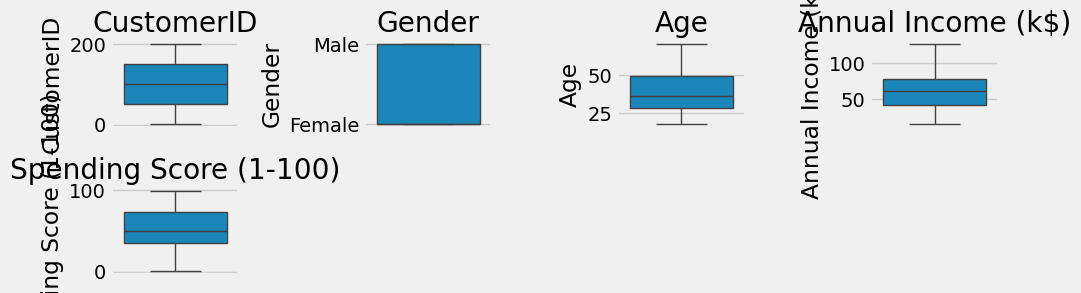

In [ ]:
#After Removing
plt.figure(figsize=(10,6))
for i, column in enumerate(df.columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=df_clean, y=column)
    plt.title(column)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_clean['Gender'] = le.fit_transform(df_clean['Gender'])

In [ ]:
# Standardize the dataset

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

In [ ]:
X_scaled

array([[-1.7234121 ,  1.12815215, -1.42456879, -1.78877673, -0.43480148],
       [-1.70609137,  1.12815215, -1.28103541, -1.78877673,  1.19570407],
       [-1.68877065, -0.88640526, -1.3528021 , -1.74885313, -1.71591298],
       [-1.67144992, -0.88640526, -1.13750203, -1.74885313,  1.04041783],
       [-1.6541292 , -0.88640526, -0.56336851, -1.70892954, -0.39597992],
       [-1.63680847, -0.88640526, -1.20926872, -1.70892954,  1.00159627],
       [-1.61948775, -0.88640526, -0.27630176, -1.66900594, -1.71591298],
       [-1.60216702, -0.88640526, -1.13750203, -1.66900594,  1.70038436],
       [-1.5848463 ,  1.12815215,  1.80493225, -1.62908235, -1.83237767],
       [-1.56752558, -0.88640526, -0.6351352 , -1.62908235,  0.84631002],
       [-1.55020485,  1.12815215,  2.02023231, -1.62908235, -1.4053405 ],
       [-1.53288413, -0.88640526, -0.27630176, -1.62908235,  1.89449216],
       [-1.5155634 , -0.88640526,  1.37433211, -1.58915875, -1.36651894],
       [-1.49824268, -0.88640526, -1.0

In [ ]:
# Determine the optimal number of clusters using the elbow method

inertia = [] #SSE
cluster_center=[]
no_iter=[]

K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    cluster_center.append(kmeans.cluster_centers_)
    no_iter.append(kmeans.n_iter_)


In [ ]:
print("Inertia:",inertia)
print("Cluster_Center:",cluster_center)
print("No. of Iterations:", no_iter)

Inertia: [1000.0000000000001, 713.7506646771352, 572.9155399564279, 457.9409600902713, 412.48217333542823, 352.91631428619536, 312.30769945599985, 282.1987683878332, 244.10321657583748, 202.6177582287316]
Cluster_Center: [array([[-1.33226763e-17,  3.10862447e-17, -1.60427227e-16,
         4.86416463e-16, -5.77315973e-17]]), array([[-0.81102231, -0.04220977,  0.24178539, -0.7595084 , -0.00924323],
       [ 0.89639308,  0.04665291, -0.26723649,  0.83945665,  0.0102162 ]]), array([[-0.47192101,  0.04093069,  1.13852727, -0.41172951, -0.37379617],
       [ 0.91530407,  0.05372153, -0.35125808,  0.86081927,  0.05780099],
       [-1.12013494, -0.15773556, -0.85348917, -1.09648458,  0.39036318]]), array([[-0.5242406 ,  0.02014557,  1.13989425, -0.4573248 , -0.31121951],
       [ 1.03142803,  0.04717012, -0.43908961,  0.95767457,  1.1919166 ],
       [-0.87968731, -0.13521436, -0.92341835, -0.85632392,  0.28964832],
       [ 1.02668595,  0.12087344,  0.10226753,  0.96744855, -1.18211652]]), ar

In [ ]:
kmeans.labels_[:7]

array([3, 3, 8, 4, 8, 4, 8], dtype=int32)

# Choosing the Appropriate Number of Clusters
## Two methods that are commonly used to evaluate the appropriate number of clusters:

 1. The elbow method
    
 2. The silhouette coefficient

These are often used as complementary evaluation techniques rather than one being preferred over the other.

To perform the elbow method, run several k-means, increment k with each iteration, and record the SSE:

# 1. The elbow method

When we plot SSE as a function of the number of clusters, SSE continues to decrease as we increase k.

As more centroids are added, the distance from each point to its closest centroid will decrease.

Spot where the SSE curve starts to bend known as the elbow point.

The x-value of this point is thought to be a reasonable trade-off between error and number of clusters.

In given below example, the elbow is located at x=3:


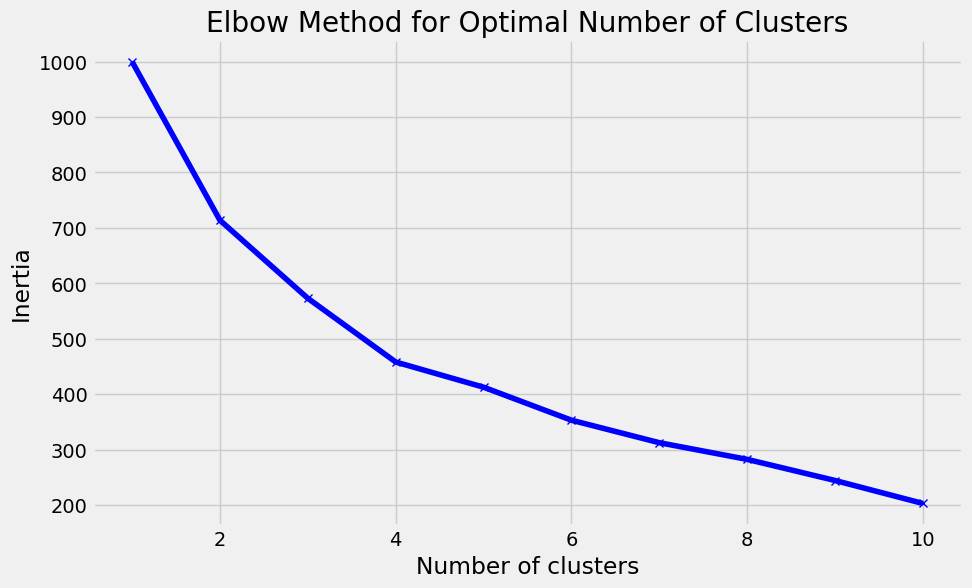

In [ ]:
# Plot the elbow curve

plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [ ]:
pip install kneed

In [ ]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing")
kl.elbow

4

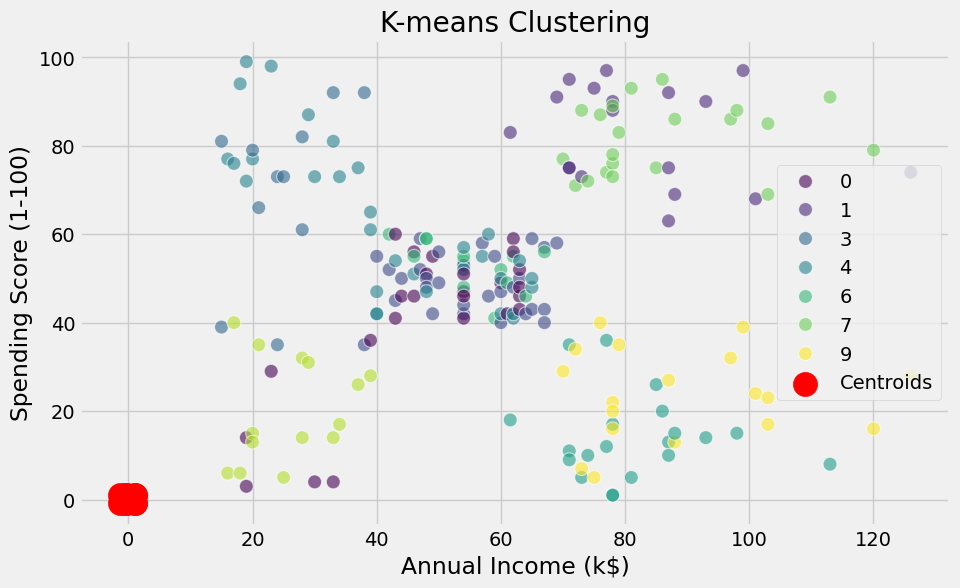

In [ ]:
# Add the cluster labels to your DataFrame
df_clean['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue = 'Cluster', palette='viridis', data=df_clean, s=100, alpha=0.6, edgecolor='w')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# 2. Silhouette Score

The silhouette coefficient is a measure of cluster cohesion and separation.

It quantifies how well a data point fits into its assigned cluster based on two factors:

 1. How close the data point is to other points in the cluster
 2. How far away the data point is from points in other clusters

Silhouette coefficient values range between -1 and 1.

Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

In the scikit-learn implementation of the silhouette coefficient, the average silhouette coefficient of all the samples is summarized into one score.

The silhouette score() function needs a minimum of two clusters, or it will raise an exception.

In [ ]:
kmeans_kwargs = {"init": "random",
                 "n_init": 10,
                 "max_iter": 300,
                 "random_state": 42, }

In [ ]:
# list holds the silhouette coefficients for each k

silhouette_coefficients = []

# start at 2 clusters for silhouette coefficient

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

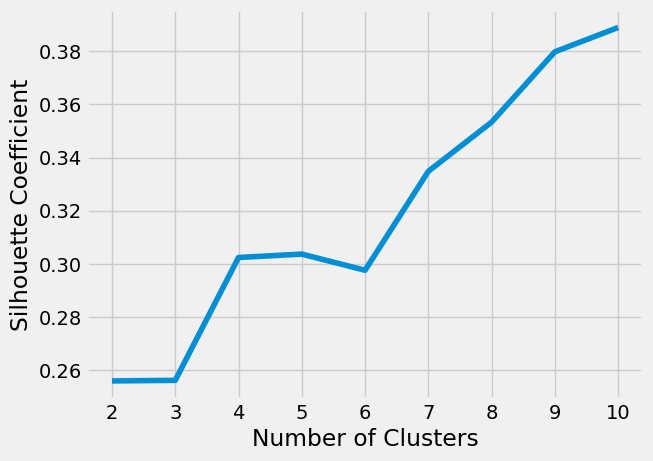

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()


### Decision on the number of clusters to use should be guided by a combination of domain knowledge and clustering evaluation metrics.

In [ ]:
# Implement k-means clustering with the optimal number of clusters
#(determined from the elbow method)

optimal_clusters = 3 # From the elbow method, suppose the optimal number of clusters is 5

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)

y_kmeans = kmeans.fit_predict(X_scaled)

In [ ]:
# Add the cluster labels to the DataFrame

df['Cluster'] = y_kmeans